In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
warnings.filterwarnings('ignore')

In [151]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Online-Shopping-Review\\Dataset\\Online Shopping Review.csv")

# Rename The Column Names

In [152]:
my_cols=["Time","Name","Age","Gender","About Shopping","Shopping For","Finding For",
         "Visiting Issue","Compared to OS","Complacency","Find ERP","Payment Complacency",
         "CheckOut Experience","Product Receive TimeLine","Rider Review","CS Experience"]

In [153]:
df.columns=my_cols

In [154]:
#Using ' ' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['Time',
 'Name',
 'Age',
 'Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Complacency',
 'Find_ERP',
 'Payment_Complacency',
 'CheckOut_Experience',
 'Product_Receive_TimeLine',
 'Rider_Review',
 'CS_Experience']

In [155]:
df.columns=new_columns

In [156]:
df.head()

,Time,Name,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,2022/06/17 12:46:08 AM GMT+6,Rajesh Das,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,2022/06/17 1:55:46 AM GMT+6,Radhika,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,2022/06/17 1:57:37 AM GMT+6,Ritu,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
3,2022/06/17 2:01:02 AM GMT+6,Nandini,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,2022/06/17 2:02:39 AM GMT+6,Ranu mondal,30,Female,Social Media,Colleague,Yes,Product Information,Product catalog,Satisfied,Yes,Very Safe,4,Maybe,4,4


# Drop  Unnecessary Columns

In [157]:
df1=df.drop(["Time","Name"],axis=1)

In [158]:
df1.shape

(4026, 14)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       4026 non-null   int64 
 1   Gender                    4026 non-null   object
 2   About_Shopping            4026 non-null   object
 3   Shopping_For              4026 non-null   object
 4   Finding_For               4026 non-null   object
 5   Visiting_Issue            4026 non-null   object
 6   Compared_to_OS            4026 non-null   object
 7   Complacency               4026 non-null   object
 8   Find_ERP                  4026 non-null   object
 9   Payment_Complacency       4026 non-null   object
 10  CheckOut_Experience       4026 non-null   int64 
 11  Product_Receive_TimeLine  4026 non-null   object
 12  Rider_Review              4026 non-null   int64 
 13  CS_Experience             4026 non-null   int64 
dtypes: int64(4), object(10)


In [160]:
df1.describe()

,Age,CheckOut_Experience,Rider_Review,CS_Experience
count,4026.000000,4026.000000,4026.000000,4026.000000
mean,29.962742,4.004719,3.955042,3.614257
std,9.304836,1.069151,1.085748,1.284977
min,8.000000,1.000000,1.000000,1.000000
25%,23.000000,3.000000,3.000000,3.000000
50%,28.000000,4.000000,4.000000,4.000000
75%,34.000000,5.000000,5.000000,5.000000
max,76.000000,5.000000,5.000000,5.000000


# Checking Null Values

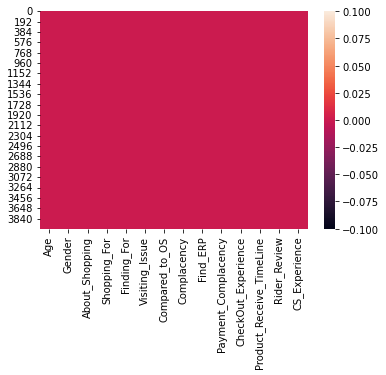

In [161]:
sns.heatmap(df1.isnull())
plt.show()

In [162]:
df1[df1.isnull().any(axis=1)].head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience


In [163]:
df1.isnull().sum()

Age                         0
Gender                      0
About_Shopping              0
Shopping_For                0
Finding_For                 0
Visiting_Issue              0
Compared_to_OS              0
Complacency                 0
Find_ERP                    0
Payment_Complacency         0
CheckOut_Experience         0
Product_Receive_TimeLine    0
Rider_Review                0
CS_Experience               0
dtype: int64

In [166]:
print("%18s %10s   %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
for col in df1.columns:
    dtyp = df1[col].dtype
    uniq = df1[col].nunique()
    na = df1[col].isna().sum()
    print("%18s %10s %10s %10s" % (col, dtyp, uniq, na))

       Column Name  Data Type    #Distinct  NA Values
               Age      int64         55          0
            Gender     object          3          0
    About_Shopping     object          6          0
      Shopping_For     object          6          0
       Finding_For     object          3          0
    Visiting_Issue     object          5          0
    Compared_to_OS     object          8          0
       Complacency     object          5          0
          Find_ERP     object          3          0
Payment_Complacency     object          5          0
CheckOut_Experience      int64          5          0
Product_Receive_TimeLine     object          3          0
      Rider_Review      int64          5          0
     CS_Experience      int64          5          0


# Seperate Categorical and Numerical Features

In [167]:
categorical_features=[]
numerical_features=[]

In [168]:
for i in df1.columns.tolist():
    if df1[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [169]:
print("-"*40)
print("Numerical Features")
print("-"*40)
for i in numerical_features:
    print('Feature: ',i)

----------------------------------------
Numerical Features
----------------------------------------
Feature:  Age
Feature:  CheckOut_Experience
Feature:  Rider_Review
Feature:  CS_Experience


In [170]:
print("-"*40)
print("Categorical Features")
print("-"*40)
for i in categorical_features:
    print('Feature:',i)

----------------------------------------
Categorical Features
----------------------------------------
Feature: Gender
Feature: About_Shopping
Feature: Shopping_For
Feature: Finding_For
Feature: Visiting_Issue
Feature: Compared_to_OS
Feature: Complacency
Feature: Find_ERP
Feature: Payment_Complacency
Feature: Product_Receive_TimeLine


# Checking Unique Value Per Column

In [171]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].unique())  

-------------------
Column Name Is Gender
-------------------
['Male' 'Female' 'Other']
-------------------
Column Name Is About_Shopping
-------------------
['Newspaper' 'Social Media' 'Friend' 'TV' 'Other' 'Search Engine']
-------------------
Column Name Is Shopping_For
-------------------
['Friend' 'Parent' 'Colleague' 'Boss' 'Other' 'Me']
-------------------
Column Name Is Finding_For
-------------------
['Yes' 'Maybe' 'No']
-------------------
Column Name Is Visiting_Issue
-------------------
['Product Information' 'Buying Products' 'Contact Information' 'Other'
 'About Company']
-------------------
Column Name Is Compared_to_OS
-------------------
['Pricing' 'Website performance' 'Product catalog' 'Overall'
 'Product information' 'Shipping options' 'Payment experience'
 'Online help']
-------------------
Column Name Is Complacency
-------------------
['Neutral' 'Very satisfied' 'Satisfied' 'Dissatisfied' 'Very dissatisfied']
-------------------
Column Name Is Find_ERP
-----------

In [172]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].value_counts())  

-------------------
Column Name Is Gender
-------------------
Female    2116
Male      1904
Other        6
Name: Gender, dtype: int64
-------------------
Column Name Is About_Shopping
-------------------
Social Media     978
Friend           850
Search Engine    836
Newspaper        714
TV               388
Other            260
Name: About_Shopping, dtype: int64
-------------------
Column Name Is Shopping_For
-------------------
Parent       898
Friend       776
Colleague    735
Me           674
Boss         567
Other        376
Name: Shopping_For, dtype: int64
-------------------
Column Name Is Finding_For
-------------------
Yes      1812
Maybe    1144
No       1070
Name: Finding_For, dtype: int64
-------------------
Column Name Is Visiting_Issue
-------------------
Contact Information    947
Product Information    934
Buying Products        919
About Company          856
Other                  370
Name: Visiting_Issue, dtype: int64
-------------------
Column Name Is Compared_to_OS
-

# Co-Relation

<AxesSubplot:>

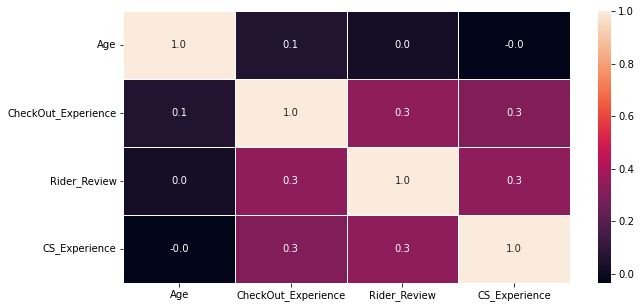

In [173]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [174]:
df1.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
3,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,30,Female,Social Media,Colleague,Yes,Product Information,Product catalog,Satisfied,Yes,Very Safe,4,Maybe,4,4


# Explority Data Analysis ( EDA )

# Payment_Complacency

In [175]:
df1["Payment_Complacency"].value_counts()

Safe           1187
Very Safe      1083
Neutral         894
Not Safe        658
Very Unsafe     204
Name: Payment_Complacency, dtype: int64

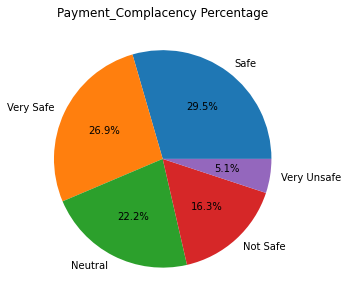

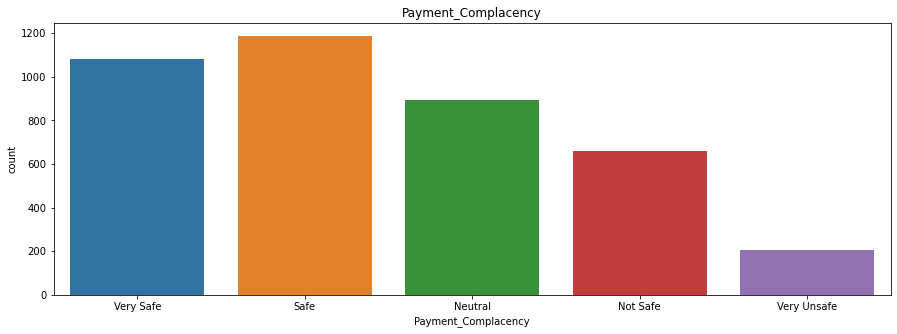

In [176]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Payment_Complacency"].value_counts()[0:5]),labels=list(df1["Payment_Complacency"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Payment_Complacency Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Payment_Complacency',data=df1)
plt.title('Payment_Complacency')
plt.show()

# Complacency

In [177]:
df1["Complacency"].value_counts()

Very satisfied       1462
Satisfied            1249
Neutral               731
Dissatisfied          440
Very dissatisfied     144
Name: Complacency, dtype: int64

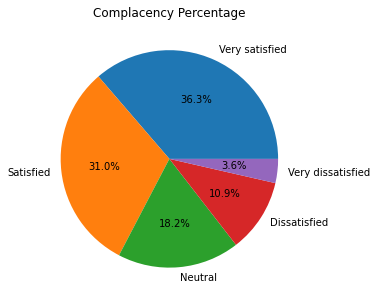

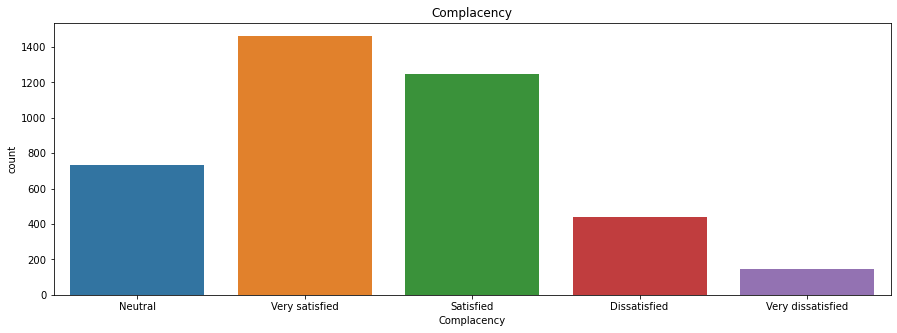

In [178]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Complacency"].value_counts()[0:5]),labels=list(df["Complacency"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Complacency Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Complacency',data=df1)
plt.title('Complacency')
plt.show()

# Compared_to_OS

In [179]:
df1["Compared_to_OS"].value_counts()

Shipping options       616
Product catalog        614
Product information    611
Pricing                557
Payment experience     536
Online help            394
Website performance    352
Overall                346
Name: Compared_to_OS, dtype: int64

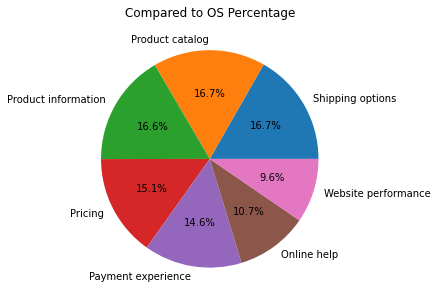

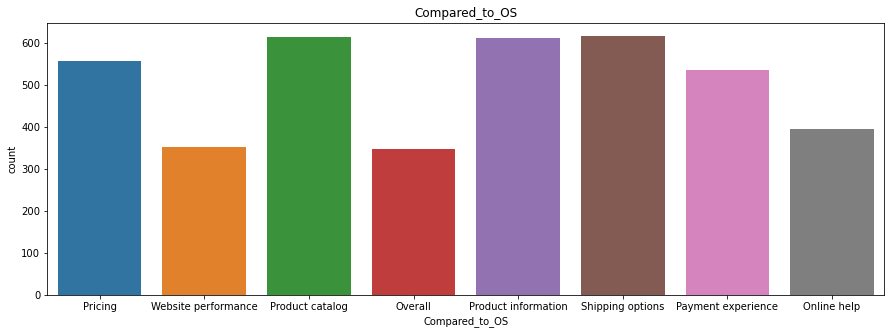

In [180]:
plt.figure(figsize=(5,5))
plt.pie(list(df1["Compared_to_OS"].value_counts()[0:7]),labels=list(df1["Compared_to_OS"].value_counts()[0:7].keys()),autopct='%0.1f%%')
plt.title('Compared to OS Percentage')
plt.show()

plt.figure(figsize=(15,5))
sns.countplot('Compared_to_OS',data=df1)
plt.title('Compared_to_OS')
plt.show()

# Visiting_Issue

In [181]:
df1["Visiting_Issue"].value_counts()

Contact Information    947
Product Information    934
Buying Products        919
About Company          856
Other                  370
Name: Visiting_Issue, dtype: int64

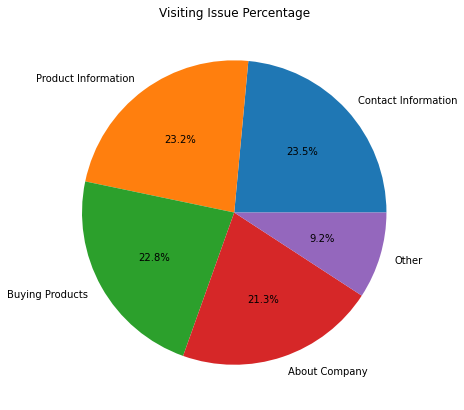

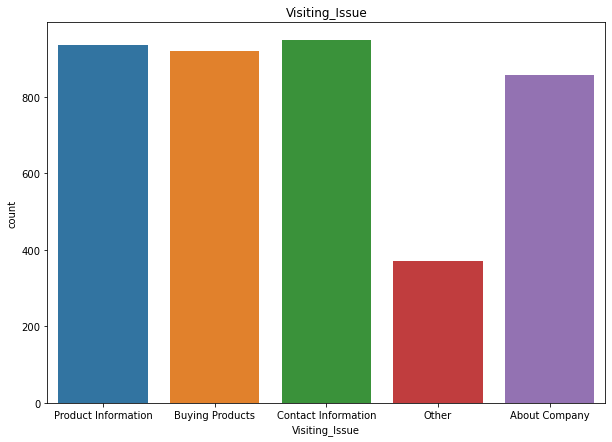

In [182]:
plt.figure(figsize=(10,7))
plt.pie(list(df1["Visiting_Issue"].value_counts()[0:5]),labels=list(df1["Visiting_Issue"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Visiting Issue Percentage')
plt.show()

plt.figure(figsize=(10,7))
sns.countplot('Visiting_Issue',data=df1)
plt.title('Visiting_Issue')
plt.show()

# About_Shopping

In [183]:
df1["About_Shopping"].value_counts()

Social Media     978
Friend           850
Search Engine    836
Newspaper        714
TV               388
Other            260
Name: About_Shopping, dtype: int64

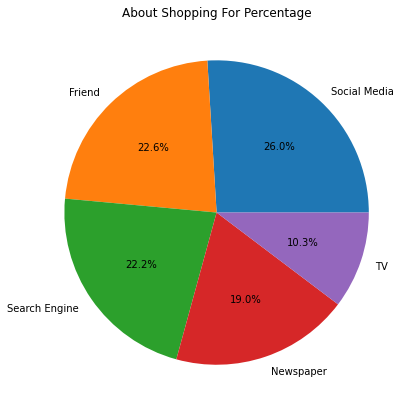

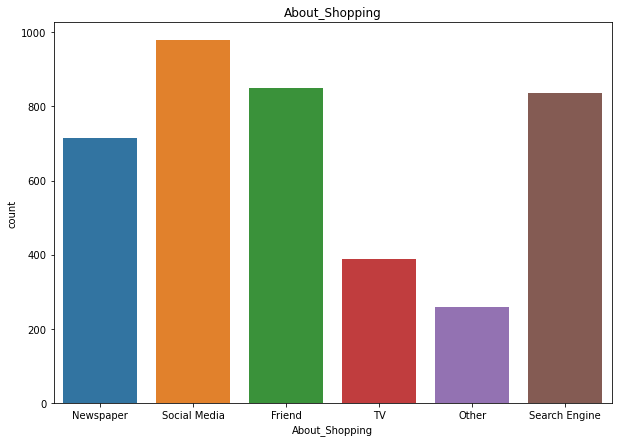

In [184]:
plt.figure(figsize=(10,7))
plt.pie(list(df1["About_Shopping"].value_counts()[0:5]),labels=list(df1["About_Shopping"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('About Shopping For Percentage')
plt.show()

plt.figure(figsize=(10,7))
sns.countplot('About_Shopping',data=df)
plt.title('About_Shopping')
plt.show()

In [280]:
df1["Gender"].value_counts()

Female    2116
Male      1904
Name: Gender, dtype: int64

In [281]:
df1.drop(df1[(df1['Gender'] =="Other")].index, inplace=True)

In [279]:
df1["Gender"].value_counts()

Female    2116
Male      1904
Name: Gender, dtype: int64

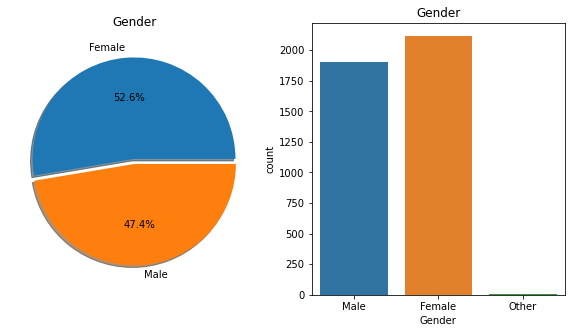

In [282]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Gender'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('Gender',data=df,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

In [283]:
df1["Shopping_For"].value_counts()

Parent       898
Friend       776
Colleague    733
Me           670
Boss         567
Other        376
Name: Shopping_For, dtype: int64

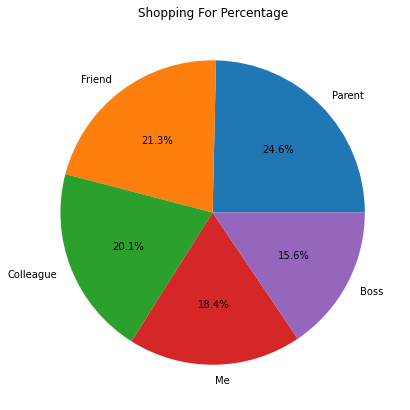

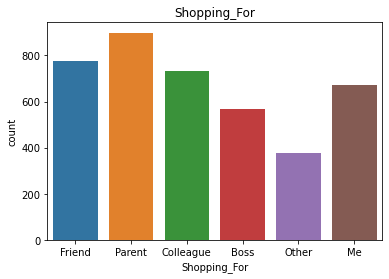

In [284]:
plt.figure(figsize=(7,7))
plt.pie(list(df1["Shopping_For"].value_counts()[0:5]),labels=list(df1["Shopping_For"].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.title('Shopping For Percentage')
plt.show()

sns.countplot('Shopping_For',data=df1)
plt.title('Shopping_For')
plt.show()

# Separate X and Y

In [285]:
target=df1["Complacency"]

In [286]:
features=df1.drop(["Complacency"],axis=1)

In [287]:
features.columns

Index(['Age', 'Gender', 'About_Shopping', 'Shopping_For', 'Finding_For',
       'Visiting_Issue', 'Compared_to_OS', 'Find_ERP', 'Payment_Complacency',
       'CheckOut_Experience', 'Product_Receive_TimeLine', 'Rider_Review',
       'CS_Experience'],
      dtype='object')

In [288]:
Features_categorical_features=[]
Features_numerical_features=[]

In [289]:
for i in features.columns.tolist():
    if features[i].dtype=="object":
        Features_categorical_features.append(i)
    else:
        Features_numerical_features.append(i)

In [290]:
Features_numerical_features

['Age', 'CheckOut_Experience', 'Rider_Review', 'CS_Experience']

In [291]:
Features_categorical_features

['Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Find_ERP',
 'Payment_Complacency',
 'Product_Receive_TimeLine']

In [292]:
le=LabelEncoder()
for i in Features_categorical_features:
    features[i]=le.fit_transform(features[i])

In [293]:
features.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,1,1,2,2,4,3,2,3,3,1,2,3
1,22,0,4,2,2,4,7,2,2,3,2,5,5
2,21,0,4,2,2,1,7,2,2,5,2,5,5
3,24,0,0,5,2,1,7,2,2,5,2,5,5
4,30,0,4,1,2,4,4,2,3,4,0,4,4


# Feature Selection

In [338]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit_features = test.fit(features,target)
score_col=pd.DataFrame(fit_features.scores_,columns=["Score_Value"])

In [339]:
score_col

,Score_Value
0,15.993216
1,13.105300
2,1.980686
3,1.148897
4,12.196394
5,6.462861
6,33.969174
7,5.683158
8,13.321991
9,23.329069


In [360]:
Name_col=pd.DataFrame(features.columns)
Name_col

,0
0,Age
1,Gender
2,About_Shopping
3,Shopping_For
4,Finding_For
5,Visiting_Issue
6,Compared_to_OS
7,Find_ERP
8,Payment_Complacency
9,CheckOut_Experience


In [362]:
top_features=pd.concat([Name_col,score_col],axis=1)
top_features

,0,Score_Value
0,Age,15.993216
1,Gender,13.105300
2,About_Shopping,1.980686
3,Shopping_For,1.148897
4,Finding_For,12.196394
5,Visiting_Issue,6.462861
6,Compared_to_OS,33.969174
7,Find_ERP,5.683158
8,Payment_Complacency,13.321991
9,CheckOut_Experience,23.329069


In [364]:
top_features.columns=["Name","Score Value"]

In [365]:
top_features.sort_values( by = 'Score Value' , ascending = False , inplace = True)
top_features

,Name,Score Value
6,Compared_to_OS,33.969174
9,CheckOut_Experience,23.329069
10,Product_Receive_TimeLine,18.151090
0,Age,15.993216
8,Payment_Complacency,13.321991
12,CS_Experience,13.180804
1,Gender,13.105300
11,Rider_Review,12.727654
4,Finding_For,12.196394
5,Visiting_Issue,6.462861


In [344]:
features.dtypes

Age                         int64
Gender                      int32
About_Shopping              int32
Shopping_For                int32
Finding_For                 int32
Visiting_Issue              int32
Compared_to_OS              int32
Find_ERP                    int32
Payment_Complacency         int32
CheckOut_Experience         int64
Product_Receive_TimeLine    int32
Rider_Review                int64
CS_Experience               int64
dtype: object

# Dropping Less Importants Column

In [366]:
top_features=features.drop(["Shopping_For","About_Shopping","Find_ERP","Visiting_Issue","Finding_For"],axis=1)

In [367]:
top_features.head()

,Age,Gender,Compared_to_OS,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,1,3,3,3,1,2,3
1,22,0,7,2,3,2,5,5
2,21,0,7,2,5,2,5,5
3,24,0,7,2,5,2,5,5
4,30,0,4,3,4,0,4,4


# Normalization of the Dataset

In [368]:
from sklearn.preprocessing import StandardScaler
X_norm=StandardScaler().fit_transform(top_features)
X_norm[0:5]

array([[-0.53295953,  1.05420327, -0.31656397,  1.0210596 , -0.93863319,
        -0.5722685 , -1.79933172, -0.47653815],
       [-0.85530115, -0.94858366,  1.57998919,  0.1953385 , -0.93863319,
         0.71870758,  0.96393589,  1.08029513],
       [-0.96274836, -0.94858366,  1.57998919,  0.1953385 ,  0.9316545 ,
         0.71870758,  0.96393589,  1.08029513],
       [-0.64040674, -0.94858366,  1.57998919,  0.1953385 ,  0.9316545 ,
         0.71870758,  0.96393589,  1.08029513],
       [ 0.00427651, -0.94858366,  0.15757432,  1.0210596 , -0.00348934,
        -1.86324457,  0.04284669,  0.30187849]])

In [369]:
# top_features.head()

In [379]:
accuracy=[]
f1=[]
model=[]

In [380]:
xtrain,xtest,ytrain,ytest=train_test_split(X_norm,target,test_size=0.25,random_state=1)

# Support Vector Machine

In [381]:
svc=SVC()
svc.fit(xtrain,ytrain)
testpredict=svc.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Support Vector Machine')

# K-Neighbors Classifier

In [382]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(xtrain, ytrain)
testpredict = KNN.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('K-Neighbors Classifier')

# Gaussian Naive Bayes

In [383]:
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)
testpredict = GNB.predict(xtest)

accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Gaussian Naive Bayes')


# Decision Tree Classifier

In [384]:
dst=tree.DecisionTreeClassifier(criterion='entropy')
dst.fit(xtrain,ytrain)
testpredict=dst.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Decision Tree Classifier')

# Random Forest Classifier

In [385]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)
testpredict=rfc.predict(xtest)
accuracy.append(np.round(accuracy_score(ytest,testpredict),2))
f1.append(np.round(f1_score(ytest,testpredict,average='weighted'),2))
model.append('Random Forest')

In [386]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'F1 score':f1})

In [387]:
output

,Model,Accuracy,F1 score
0,Support Vector Machine,0.44,0.39
1,K-Neighbors Classifier,0.85,0.85
2,Gaussian Naive Bayes,0.39,0.35
3,Decision Tree Classifier,0.84,0.84
4,Random Forest,0.86,0.86
